# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint 
from scipy.stats import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [40]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [41]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?lat=44.34&lon=10.99&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jiagedaqi
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | piti village
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | aasiaat
Processing Record 9 of Set 1 | vicuna
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | lorengau
Processing Record 14 of Set 1 | nar'yan-mar
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | i-n-salah
Processing Record 19 of Set 1 | gbarnga
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | alofi
Processing Record 22 of Set 1 | hawaiian paradise park
Proces

In [42]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [43]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jiagedaqi,50.4167,124.1167,253.82,62,1,1.80,CN,1702358247
1,new norfolk,-42.7826,147.0587,295.87,29,87,2.79,AU,1702358248
2,piti village,13.4626,144.6933,303.88,76,75,5.14,GU,1702358248
3,isafjordur,66.0755,-23.1240,268.06,79,34,3.00,IS,1702358248
4,ushuaia,-54.8000,-68.3000,281.96,57,0,1.54,AR,1702358249


In [44]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [45]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jiagedaqi,50.4167,124.1167,253.82,62,1,1.80,CN,1702358247
1,new norfolk,-42.7826,147.0587,295.87,29,87,2.79,AU,1702358248
2,piti village,13.4626,144.6933,303.88,76,75,5.14,GU,1702358248
3,isafjordur,66.0755,-23.1240,268.06,79,34,3.00,IS,1702358248
4,ushuaia,-54.8000,-68.3000,281.96,57,0,1.54,AR,1702358249


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

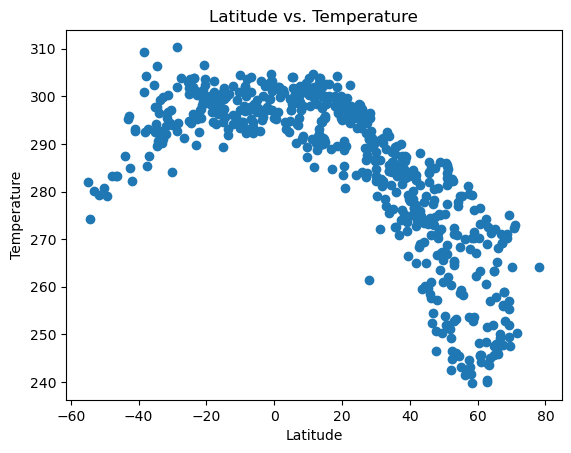

In [46]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(latitude,temp)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

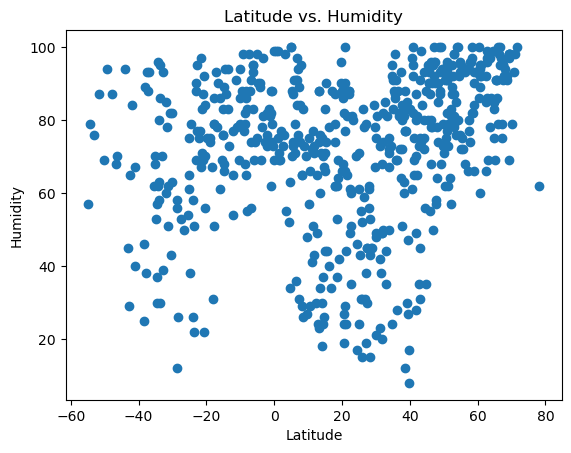

In [47]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']
plt.scatter(latitude,humidity)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

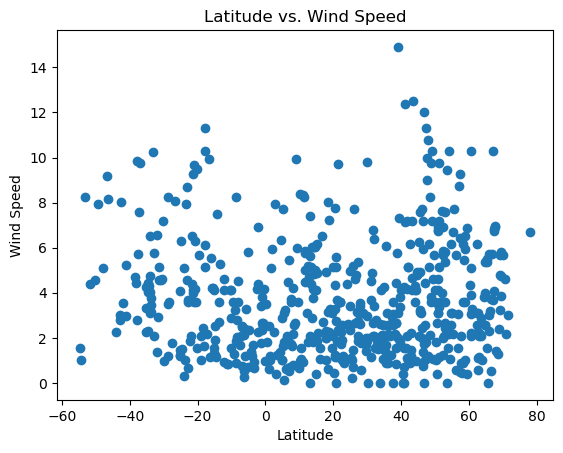

In [48]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude,wind_speed)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

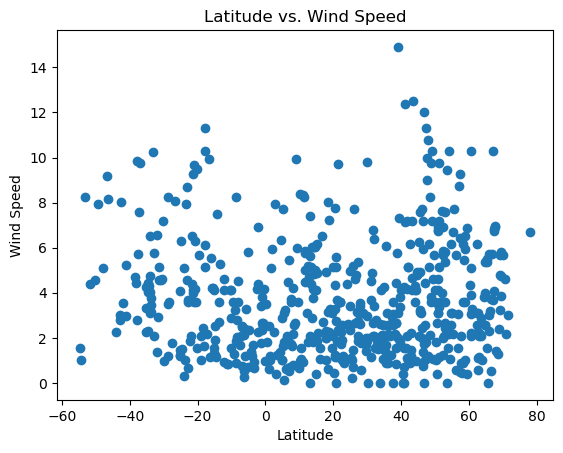

In [49]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude,wind_speed)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jiagedaqi,50.4167,124.1167,253.82,62,1,1.80,CN,1702358247
2,piti village,13.4626,144.6933,303.88,76,75,5.14,GU,1702358248
3,isafjordur,66.0755,-23.1240,268.06,79,34,3.00,IS,1702358248
7,aasiaat,68.7098,-52.8699,270.30,92,100,1.28,GL,1702358250
13,nar'yan-mar,67.6713,53.0870,258.93,92,100,6.92,RU,1702358252


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,new norfolk,-42.7826,147.0587,295.87,29,87,2.79,AU,1702358248
4,ushuaia,-54.8000,-68.3000,281.96,57,0,1.54,AR,1702358249
5,avarua,-21.2078,-159.7750,298.18,83,100,9.26,CK,1702358249
6,invercargill,-46.4000,168.3500,283.29,70,91,8.16,NZ,1702358250
8,vicuna,-30.0319,-70.7081,284.00,63,0,0.98,CL,1702358142


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7126793748420372


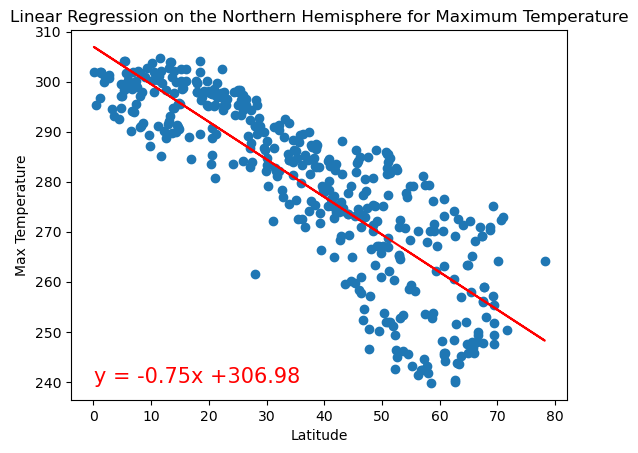

In [64]:
# Northern Hemisphere
# Create Plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Scatter plot
plt.scatter(x_values, y_values)

# Plot linear regression line
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Linear Regression on the Northern Hemisphere for Maximum Temperature')
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r_value**2}")

# Show plot
plt.show()



The r-value is: 0.27761727935680336


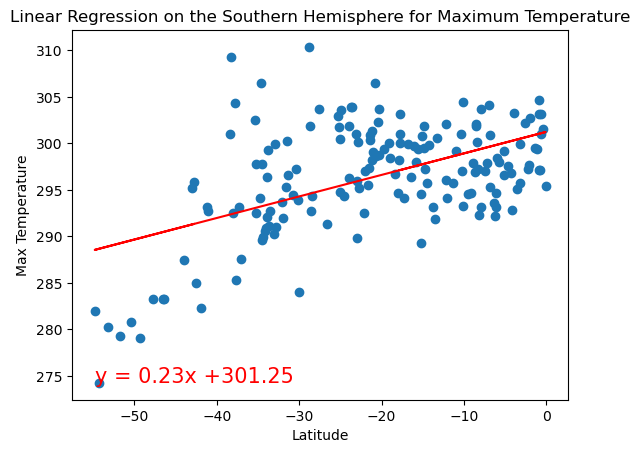

In [65]:
# Southern Hemisphere
# Create Plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Scatter plot
plt.scatter(x_values, y_values)

# Plot linear regression line
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Linear Regression on the Southern Hemisphere for Maximum Temperature')
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r_value**2}")

# Show plot
plt.show()

**Discussion about the linear relationship: 

There is a strong negative correlation between latitude and temperature in the Nortern Hemisphere. As you move away from the equator (as latitude value increases) the temperature decreases. We can say that there is a strong negative correlation based on the r value being -0.75. The closer an r value is to one, the stronger the correlation. 
There is a weak positive correlation between latitude and temperature in the Southern Hemisphere. Because the r value in this scenario is 0.23, we can say that there isn't a strong correlation between latitude and temperature in the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09995833837086589


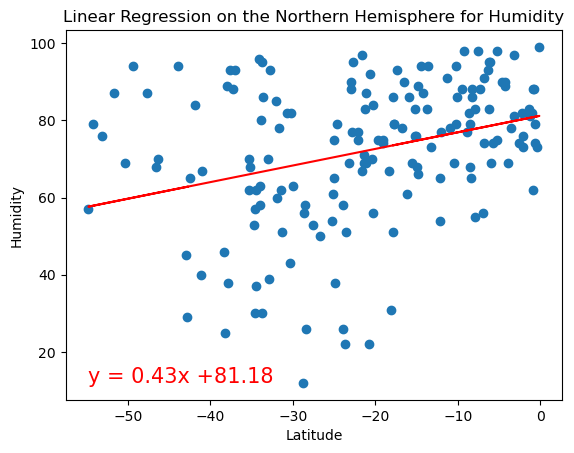

In [67]:
# Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Scatter plot
plt.scatter(x_values, y_values)

# Plot linear regression line
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression on the Northern Hemisphere for Humidity')
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r_value**2}")

# Show plot
plt.show()


The r-value is: 0.09995833837086589


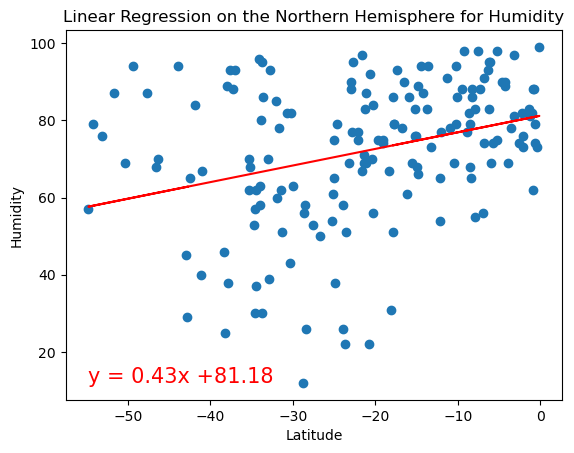

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Scatter plot
plt.scatter(x_values, y_values)

# Plot linear regression line
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression on the Northern Hemisphere for Humidity')
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r_value**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06909525028145833


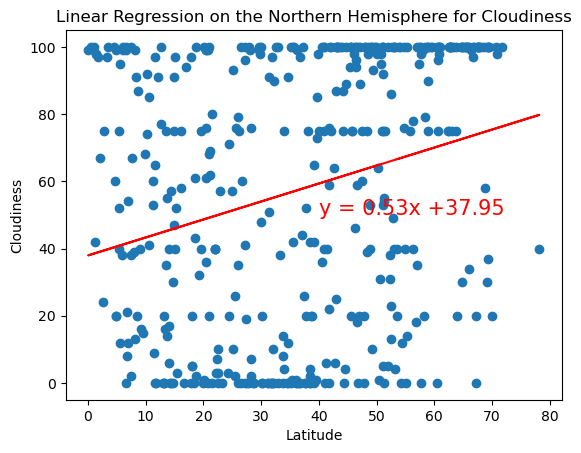

In [79]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Scatter plot
plt.scatter(x_values, y_values)

# Plot linear regression line
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression on the Northern Hemisphere for Cloudiness')
plt.annotate(line_eq, (40, 50), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r_value**2}")

# Show plot
plt.show()


The r-value is: 0.03204356828299566


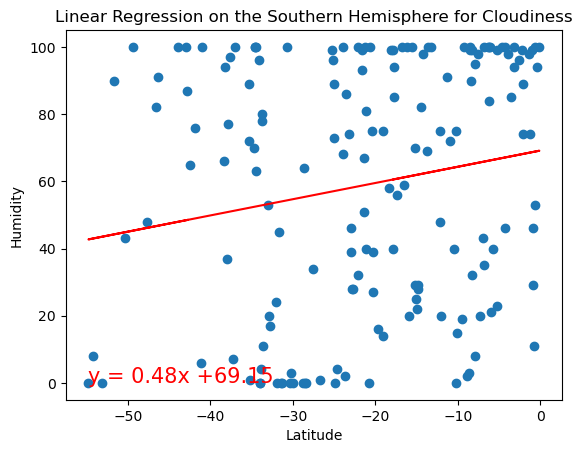

In [80]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Scatter plot
plt.scatter(x_values, y_values)

# Plot linear regression line
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression on the Southern Hemisphere for Cloudiness')
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r_value**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02259294623036434


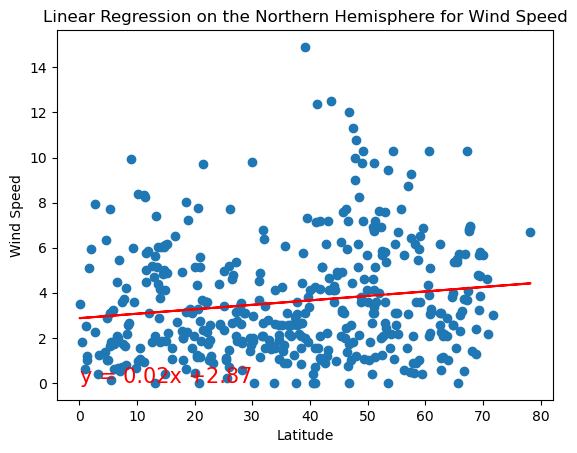

In [82]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Scatter plot
plt.scatter(x_values, y_values)

# Plot linear regression line
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression on the Northern Hemisphere for Wind Speed')
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r_value**2}")

# Show plot
plt.show()

The r-value is: 0.10607324287423814


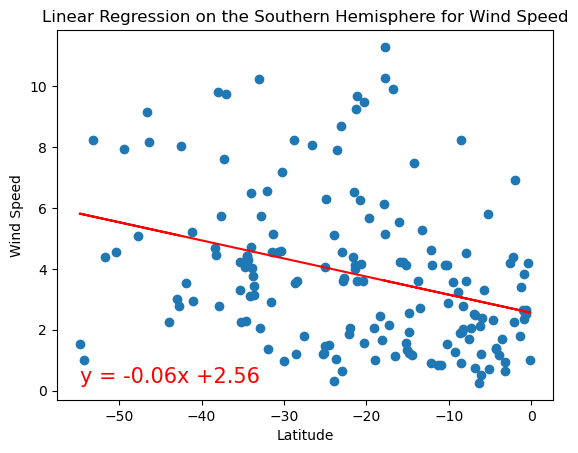

In [84]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Scatter plot
plt.scatter(x_values, y_values)

# Plot linear regression line
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression on the Southern Hemisphere for Wind Speed')
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r_value**2}")

# Show plot
plt.show()

**Discussion about the linear relationship: There is no clear correlation between latitude and windspeed in the northern and southern hemispheres as the r values are relatively small with a .02 and .1 r values respectively.